In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Generate synthetic data similar to the PINN example
np.random.seed(42)
num_samples = 5000
L = 1.0
x_train = np.random.uniform(0, L, (num_samples, 1))
t_train = np.random.uniform(0, 1, (num_samples, 1))

In [3]:
def exact_solution(x, t, L=1.0, alpha=0.01, N=1):
    u = np.zeros_like(x)
    for n in range(1, N+1):
        Bn = 1
        u += Bn * np.sin(n * np.pi * x / L) * np.exp(-alpha * (n * np.pi / L)**2 * t)
    return u

In [4]:
u_exact = exact_solution(x_train, t_train, L=L, alpha=0.01, N=1)
input_train = np.concatenate([x_train, t_train], axis=1)

# Simple neural network model
model = Sequential([
    Dense(100, activation='tanh', input_shape=(2,)),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(1, activation=None)
])

c:\Users\User\Desktop\MajorProject\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse')  # Mean squared error

# Train the model
history = model.fit(input_train, u_exact,
                    batch_size=32,
                    epochs=5000,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5000


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9972e-04 - val_loss: 9.3215e-07
Epoch 2/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3668e-07 - val_loss: 8.3620e-07
Epoch 3/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6865e-07 - val_loss: 7.5276e-07
Epoch 4/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8917e-07 - val_loss: 2.0427e-06
Epoch 5/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4014e-06 - val_loss: 1.9380e-06
Epoch 6/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6677e-06 - val_loss: 9.5243e-06
Epoch 7/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3420e-06 - val_loss: 3.0508e-06
Epoch 8/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8787e-06 - val_loss: 2.5183e-05
Epoch 9/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0336e-06 - val_loss: 1.2880e-06
Epoch 10/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5375e-06 - val_loss: 3.7003e-06
Epoch 11/5000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


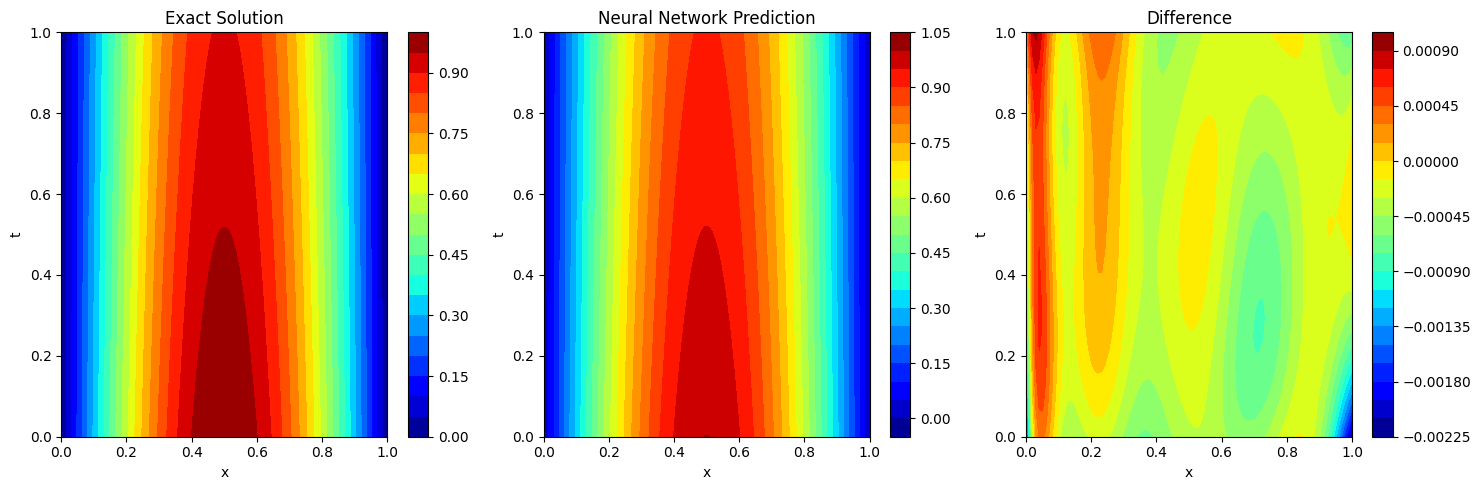

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


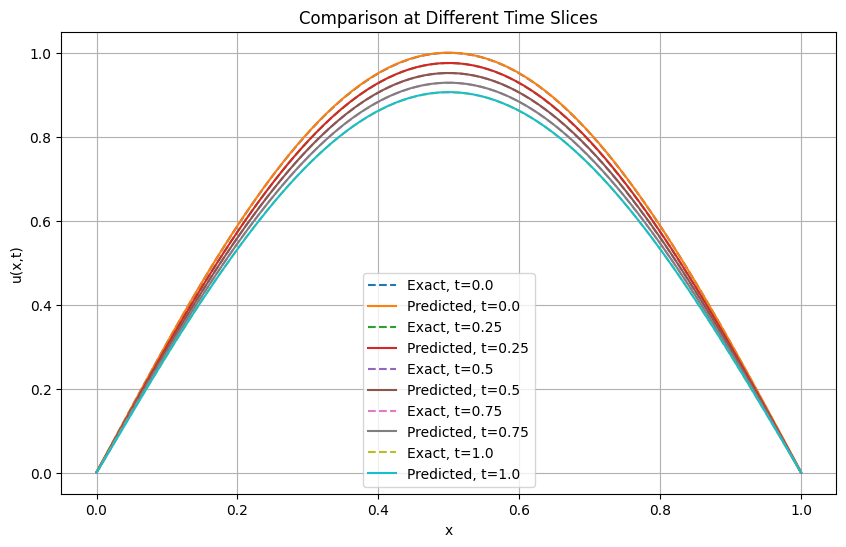

In [12]:
import matplotlib.pyplot as plt

# Generate test points for plotting
x_plot = np.linspace(0, L, 100)
t_plot = np.linspace(0, 1, 100)
X_plot, T_plot = np.meshgrid(x_plot, t_plot)
input_plot = np.stack([X_plot.flatten(), T_plot.flatten()], axis=1)

# Get exact and predicted solutions
u_exact_plot = exact_solution(X_plot.flatten()[:, None], 
                             T_plot.flatten()[:, None], 
                             L=L, alpha=0.01, N=1)
u_pred_plot = model.predict(input_plot).reshape(X_plot.shape)

# Plotting
plt.figure(figsize=(15, 5))

# Plot exact solution
plt.subplot(1, 3, 1)
plt.contourf(X_plot, T_plot, u_exact_plot.reshape(X_plot.shape), 20, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Exact Solution')

# Plot neural network prediction
plt.subplot(1, 3, 2)
plt.contourf(X_plot, T_plot, u_pred_plot, 20, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Neural Network Prediction')

# Plot difference
plt.subplot(1, 3, 3)
plt.contourf(X_plot, T_plot, u_exact_plot.reshape(X_plot.shape) - u_pred_plot, 20, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Difference')

plt.tight_layout()
plt.show()

# Plot at specific time slices
time_slices = [0.0, 0.25, 0.5, 0.75, 1.0]
plt.figure(figsize=(10, 6))
for t in time_slices:
    x_line = np.linspace(0, L, 100)
    t_line = np.full_like(x_line, t)
    input_line = np.stack([x_line, t_line], axis=1)
    
    u_exact_line = exact_solution(x_line[:, None], t_line[:, None], L=L, alpha=0.01, N=1)
    u_pred_line = model.predict(input_line)
    
    plt.plot(x_line, u_exact_line, '--', label=f'Exact, t={t}')
    plt.plot(x_line, u_pred_line, '-', label=f'Predicted, t={t}')

plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Comparison at Different Time Slices')
plt.legend()
plt.grid(True)
plt.show()